# TF Graphs

In [1]:
import tensorflow as tf

In [2]:
n1 = tf.constant(1)
n2 = tf.constant(2)

In [3]:
n3 = n1 + n2

In [4]:
with tf.Session() as sess:
    result = sess.run(n3)

In [5]:
print(result)

3


In [6]:
print(n3)

Tensor("add:0", shape=(), dtype=int32)


In [10]:
tf.get_default_graph()

In [11]:
g = tf.Graph()

In [12]:
g

In [13]:
graph1 = tf.get_default_graph()

In [14]:
graph1

In [15]:
graph2 = tf.Graph()

In [16]:
graph2

In [17]:
with graph2.as_default():
    print(graph2 is tf.get_default_graph())

True


In [18]:
graph2 is tf.get_default_graph()

False

# Variables and Placeholders

In [19]:
sess = tf.InteractiveSession()

In [20]:
my_tensor = tf.random_uniform((4,4),0,1)

In [21]:
my_tensor

<tf.Tensor 'random_uniform:0' shape=(4, 4) dtype=float32>

In [22]:
my_var = tf.Variable(initial_value=my_tensor)

In [23]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


In [25]:
init = tf.global_variables_initializer()

In [26]:
sess.run(init)

In [27]:
sess.run(my_var)

array([[0.26544368, 0.8293481 , 0.15909171, 0.14739501],
       [0.31447577, 0.11719263, 0.7591381 , 0.3802476 ],
       [0.49167526, 0.9686425 , 0.87948215, 0.0019145 ],
       [0.917161  , 0.12294495, 0.77633977, 0.2998551 ]], dtype=float32)

In [28]:
placholder = tf.placeholder(tf.float32)

# First Neuron

In [1]:
import numpy as np
import tensorflow as tf

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [6]:
rand_b = np.random.uniform(0,100,(5,1))

In [7]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [11]:
add_op = a + b

In [12]:
times_op = a * b

In [16]:
with tf.Session() as sess:
    result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    mult = sess.run(times_op, feed_dict={a:rand_a, b:rand_b})

In [15]:
result

array([[151.07166 , 156.49855 , 102.27921 , 116.58396 , 167.95949 ],
       [135.45622 ,  82.76316 , 141.42784 , 124.22093 ,  71.06043 ],
       [113.30171 ,  93.09215 ,  76.06819 , 136.43912 , 154.42728 ],
       [ 96.71727 ,  81.83804 , 133.83675 , 146.38118 , 101.10579 ],
       [122.72681 , 105.982925,  59.044632,  67.9831  ,  72.89292 ]],
      dtype=float32)

In [17]:
mult

array([[5134.644  , 5674.25   ,  283.12433, 1705.4707 , 6813.8315 ],
       [4341.8125 , 1598.267  , 4652.734  , 3756.8293 ,  988.94635],
       [3207.8113 , 2038.1029 , 1052.7742 , 4546.9805 , 5588.1157 ],
       [1707.379  ,  614.02527, 4434.989  , 5356.7773 , 2029.8555 ],
       [3714.0984 , 2806.6438 ,  262.76764,  747.19855, 1013.292  ]],
      dtype=float32)

# Example Neural Network

In [18]:
n_features = 10
n_dense_neurons = 3

In [19]:
x = tf.placeholder(tf.float32,(None, n_features))

In [20]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

In [22]:
xW = tf.matmul(x,W)
z = tf.add(xW, b)

In [29]:
a = tf.sigmoid(z)

In [30]:
init = tf.global_variables_initializer()

In [31]:
with tf.Session() as sess:
    sess.run(init)
    layout = sess.run(a, feed_dict={x:np.random.random([1,n_features])})

In [32]:
layout

array([[0.76805174, 0.5419233 , 0.474867  ]], dtype=float32)

## Simple Regression Example

In [33]:
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [34]:
x_data

array([-1.13869902,  1.11146125,  1.13625093,  1.99175854,  3.47927521,
        5.38265995,  7.79942864,  9.12557016,  8.82339114,  9.88335803])

In [35]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

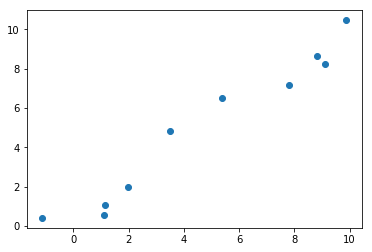

In [40]:
plt.plot(x_data, y_label, 'o')

### y = mx + b

In [41]:
np.random.rand(2)

array([0.2091615 , 0.65992452])

In [42]:
m = tf.Variable(0.21)
b = tf.Variable(0.66)

In [43]:
error = 0
for x,y in zip (x_data, y_label):
    y_hat = m*x+b
    
    error+=(y-y_hat)**2

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [45]:
init = tf.global_variables_initializer()

In [51]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m,b])

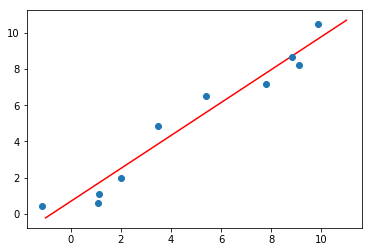

In [52]:
x_test = np.linspace(-1,11)

y_pred = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred, 'r')
plt.plot(x_data, y_label, 'o')